In [ ]:
!pip install statsmodels==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Moving Average Process

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Simulate MA(2) process
$ y_t = 0.9Z_{t-1} + 0.3Z_{t-2} $

In [ ]:
ma2 = np.array([1, 0.9, 0.3])
ar2 = np.array([1, 0, 0])

print(ma2)
print(ar2)

[1.  0.9 0.3]
[1 0 0]


In [ ]:
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

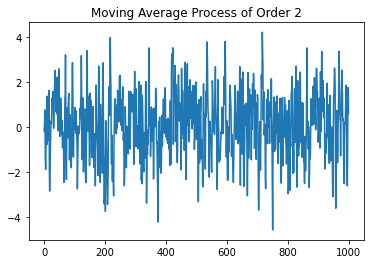

In [ ]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.show()

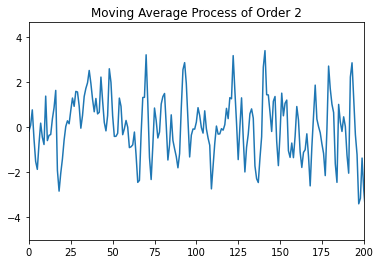

In [ ]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.xlim(0, 200)
plt.show()

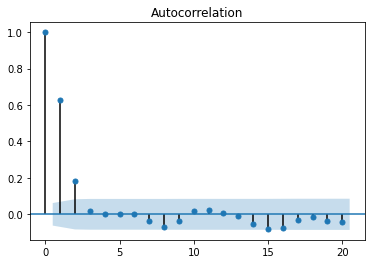

In [ ]:
plot_acf(MA2_process, lags=20);

In [ ]:
MA_model = ARIMA(MA2_process, order=(0,0,2), enforce_stationarity=False).fit()

print(MA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1432.580
Date:                Tue, 21 Jun 2022   AIC                           2873.160
Time:                        10:45:59   BIC                           2892.779
Sample:                             0   HQIC                          2880.617
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1097      0.071      1.536      0.125      -0.030       0.250
ma.L1          0.9094      0.030     30.694      0.000       0.851       0.967
ma.L2          0.3044      0.030     10.180      0.0